<a href="https://colab.research.google.com/github/VindiSovia/Analisis_Sentimen/blob/main/Preprosesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install nltk
!pip install kbbi
!pip install Sastrawi
!pip install emoji

import pandas as pd
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [91]:
bkl_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/BukalapakGPS.csv")
lzd_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/LazadaGPS.csv")
shp_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/ShopeeGPS.csv")
tkp_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/TokopediaGPS.csv")

In [92]:
bkl_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/BukalapakAPST.csv")
lzd_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/LazadaAPST.csv")
shp_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/ShopeeAPST.csv")
tkp_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/TokopediaAPST.csv")

In [200]:
tkp_app.head()

,userName,rating,date,review
0,Nadhif Abqary,5,2024-01-31 23:44:57,The Best Platform Belanja Online
1,azrhil,5,2024-01-31 23:41:46,Keren bangetlah
2,apurw,5,2024-01-31 23:38:13,Good
3,Edsu2,5,2024-01-31 23:29:45,👍
4,Lucy_Ang,5,2024-01-31 23:18:04,Good


In [201]:
print(tkp_app.columns)

Index(['userName', 'rating', 'date', 'review'], dtype='object')


In [202]:
tkp_app.shape

(125, 4)

# **Casefolding**

In [203]:
df = tkp_app

In [204]:
df = df.drop('userName', axis=1)
df = df.drop('date', axis=1)
df = df.dropna(axis=1)

In [205]:
df.head()

,rating,review
0,5,The Best Platform Belanja Online
1,5,Keren bangetlah
2,5,Good
3,5,👍
4,5,Good


In [206]:
df.shape

(125, 2)

# **CLEANSING**

In [207]:
import emoji

def preprocess_text(kalimat):
  # Mengubah kalimat menjadi huruf kecil
  lower_case = kalimat.lower()

  # Menghapus angka dari kalimat
  hasil = re.sub(r"\d+", "", lower_case)

  # Menghapus tanda baca dari kalimat
  hasil = hasil.translate(str.maketrans("", "", string.punctuation))

  # Menghapus emoji dari kalimat
  hasil = emoji.replace_emoji(hasil, replace="")

  # Menghapus spasi pada awal dan akhir kalimat
  hasil = hasil.strip()

  # Menghapus `@`, `HTTP`, dan `HTTPS`
  hasil = re.sub(r"(^@\w+)|(http(s)?:\/\S+)", "", hasil)

  return hasil

In [208]:
df['text_clean'] = df['review'].apply(preprocess_text)
df.head()

,rating,review,text_clean
0,5,The Best Platform Belanja Online,the best platform belanja online
1,5,Keren bangetlah,keren bangetlah
2,5,Good,good
3,5,👍,
4,5,Good,good


In [209]:
# Kamus singkatan ke kata baku
kamus_singkatan = {
    "yg": "yang",
    "kurleb": "kurang lebih",
    "udh": "udah",
    "gak": "tidak",
    "ga": "tidak",
    "skrg": "sekarang",
    "bgt": "banget",
    "krn": "karena",
    "th": "tahun",
    "kyk": "kayak",
    "jd": "jadi",
    "tp": "tapi",
    # Tambahkan singkatan dan kata baku lainnya sesuai kebutuhan
}

def benarkan_singkatan(teks, kamus):
    kata_kunci = teks.split()  # Membagi teks menjadi kata-kata
    teks_benar = []
    for kata in kata_kunci:
        teks_benar.append(kamus.get(kata, kata))  # Mengganti kata singkatan jika ada dalam kamus
    return " ".join(teks_benar)  # Menggabungkan kembali kata-kata menjadi teks


In [210]:
# Terapkan fungsi benarkan_singkatan ke setiap entri dalam kolom 'text_clean'
df['baku'] = df['text_clean'].apply(benarkan_singkatan, kamus=kamus_singkatan)
df.head()

,rating,review,text_clean,baku
0,5,The Best Platform Belanja Online,the best platform belanja online,the best platform belanja online
1,5,Keren bangetlah,keren bangetlah,keren bangetlah
2,5,Good,good,good
3,5,👍,,
4,5,Good,good,good


# **Tokenizing**

In [211]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [212]:
def tokenize_text(kalimat):
  tokens = nltk.tokenize.word_tokenize(kalimat)
  return tokens

In [213]:
df['token'] = df['baku'].apply(tokenize_text)
df.head()

,rating,review,text_clean,baku,token
0,5,The Best Platform Belanja Online,the best platform belanja online,the best platform belanja online,"[the, best, platform, belanja, online]"
1,5,Keren bangetlah,keren bangetlah,keren bangetlah,"[keren, bangetlah]"
2,5,Good,good,good,[good]
3,5,👍,,,[]
4,5,Good,good,good,[good]


# **Filtering (Stopword Removal)**

In [214]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [215]:
def stopwords_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [216]:
df['stop'] = df['token'].apply(stopwords_text)
df.head()

,rating,review,text_clean,baku,token,stop
0,5,The Best Platform Belanja Online,the best platform belanja online,the best platform belanja online,"[the, best, platform, belanja, online]","[the, best, platform, belanja, online]"
1,5,Keren bangetlah,keren bangetlah,keren bangetlah,"[keren, bangetlah]","[keren, bangetlah]"
2,5,Good,good,good,[good],[good]
3,5,👍,,,[],[]
4,5,Good,good,good,[good],[good]


# **Stemming**

In [217]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Instantiate StemmerFactory
stem_factory = StemmerFactory()

# Create stemmer
stemmer = stem_factory.create_stemmer()

In [218]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

In [219]:
df['stemmed'] = df['stop'].apply(stemming_text)
df.head()

,rating,review,text_clean,baku,token,stop,stemmed
0,5,The Best Platform Belanja Online,the best platform belanja online,the best platform belanja online,"[the, best, platform, belanja, online]","[the, best, platform, belanja, online]","[the, best, platform, belanja, online]"
1,5,Keren bangetlah,keren bangetlah,keren bangetlah,"[keren, bangetlah]","[keren, bangetlah]","[keren, banget]"
2,5,Good,good,good,[good],[good],[good]
3,5,👍,,,[],[],[]
4,5,Good,good,good,[good],[good],[good]


# **Hasil steaming dan TF-IDF**

In [220]:
from nltk.probability import FreqDist

In [221]:
import matplotlib.pyplot as plt

all_tokens = [token for sublist in df['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('tokopedia', 23), ('belanja', 21), ('aplikasi', 19), ('biaya', 18), ('makin', 16), ('banget', 15), ('beli', 15), ('barang', 14), ('sama', 14), ('bayar', 13), ('udah', 13), ('kirim', 13), ('pake', 11), ('banyak', 10), ('aja', 10), ('jadi', 10), ('good', 9), ('malah', 9), ('tokped', 9), ('rb', 9), ('jual', 9), ('nya', 9), ('baik', 9), ('sy', 9), ('cari', 8), ('toped', 8), ('bener', 8), ('promo', 8), ('jelas', 8), ('gw', 8), ('jg', 8), ('rugi', 8), ('dgn', 8), ('produk', 7), ('kurir', 7), ('lama', 7), ('update', 7), ('cashback', 7), ('lebih', 7), ('sekarang', 7), ('sistem', 7), ('shopee', 7), ('tdk', 7), ('akun', 7), ('voucher', 7), ('the', 6), ('online', 6), ('sangat', 6), ('app', 6), ('padahal', 6), ('ongkir', 6), ('jasa', 6), ('potong', 6), ('chat', 6), ('mahal', 6), ('hari', 6), ('saldo', 6), ('admin', 6), ('sering', 6), ('seller', 6), ('apa', 6), ('apps', 5), ('murah', 5), ('mudah', 5), ('suka', 5), ('mau', 5), ('care', 5), ('solusi', 5), ('masalah', 5), ('kali', 5), ('bikin', 5), 

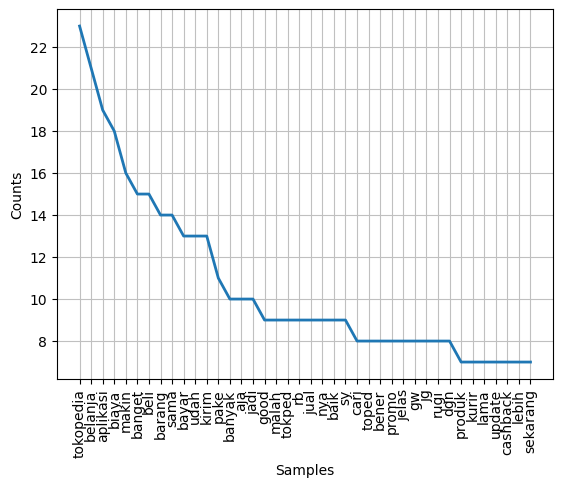

In [222]:
freq_dist.plot(40,cumulative=False)
plt.show()

# **SAVE TO GDRIVE**

In [223]:
df.to_csv("tkp_app_pres.csv", index=False)

In [224]:
df.head()

,rating,review,text_clean,baku,token,stop,stemmed
0,5,The Best Platform Belanja Online,the best platform belanja online,the best platform belanja online,"[the, best, platform, belanja, online]","[the, best, platform, belanja, online]","[the, best, platform, belanja, online]"
1,5,Keren bangetlah,keren bangetlah,keren bangetlah,"[keren, bangetlah]","[keren, bangetlah]","[keren, banget]"
2,5,Good,good,good,[good],[good],[good]
3,5,👍,,,[],[],[]
4,5,Good,good,good,[good],[good],[good]


In [225]:
%cp -R /content/tkp_app_pres.csv /content/drive/MyDrive/Skripsi/Dataset/Hasil_preprosessing/tkp_app_pres.csv